# Problem 1 (30 min)

Observe that we can time how long it takes to run some code by using the `time` module:


In [ ]:
from time import time
start = time()

# begin code to time
myList = [k**2+k+1 for k in range(10000)]
mySum = sum(myList)
# end code to time

diff = time()-start
print(diff)

0.00748896598815918


a) Create a function `measure_time(f,x)` that measures the amount of time it takes to apply the function `f` to a single input `x`.

Note: you may get a slightly different time than shown in the example below, because the time that the computer takes to run the function is not always exactly the same.

```
def f(x):
    my_list = [k**2+k+1 for k in range(x)]
    my_sum = sum(my_list)
    return my_sum

measure_time(f,10000)
---
0.003872394561767578
```

b) Create a function `time_statistics(f,x,num_samples=100)` that computes `num_samples` samples of the time it takes to apply the function `f` to the input `x`, and returns the resulting mean and standard deviation of the time.

```
>>> time_statistics(f,10000)
{
  'mean': 0.003220198154449463,
  'stdev': 0.00035378651456685384
}
```

# Problem 2 (60 min)

a) Create a function `gap_swap_sort(x)` that sorts a list `x` in a way that is similar to `swap_sort`, except instead of looping through the whole list each time, we loop through "gaps" of the list and cut the gap in half after each iteration.

For example, for the following list of length $8,$ the first gap is ${8/2} = 4.$

$$
[3, 2, 5, 1, 7, 4, 1, 2] \\
[\underline{\mathbf{3}}, 2, 5, 1, \underline{\mathbf{7}}, 4, 1, 2]\\
[3, \underline{\mathbf{2}}, 5, 1, 7, \underline{\mathbf{4}}, 1, 2]\\
[3, 2, \underline{\mathbf{1}}, 1, 7, 4, \underline{\mathbf{5}}, 2]\\
[3, 2, 1, \underline{\mathbf{1}}, 7, 4, 5, \underline{\mathbf{2}}]
$$

Now, the gap becomes $4/2 = 2.$

$$
[3, 2, 1, 1, 7, 4, 5, 2] \\
[\underline{\mathbf{1}}, 2, \underline{\mathbf{3}}, 1, 7, 4, 5, 2] \\
[1, \underline{\mathbf{1}}, 3, \underline{\mathbf{2}}, 7, 4, 5, 2] \\
[1, 1, \underline{\mathbf{3}}, 2, \underline{\mathbf{7}}, 4, 5, 2] \\
[1, 1, 3, \underline{\mathbf{2}}, 7, \underline{\mathbf{4}}, 5, 2] \\
[1, 1, 3, 2, \underline{\mathbf{5}}, 4, \underline{\mathbf{7}}, 2] \\
[1, 1, 3, 2, 5, \underline{\mathbf{2}}, 7, \underline{\mathbf{4}}]
$$

Now, the gap becomes $2/2  = 1,$ which is just an iteration of `swap_sort`:

$$
[1, 1, 3, 2, 5, 2, 7, 4] \\
[\underline{\mathbf{1}}, \underline{\mathbf{1}}, 3, 2, 5, 2, 7, 4] \\
[1, \underline{\mathbf{1}}, \underline{\mathbf{3}}, 2, 5, 2, 7, 4] \\
[1, 1, \underline{\mathbf{2}}, \underline{\mathbf{3}}, 5, 2, 7, 4] \\
[1, 1, 2, \underline{\mathbf{3}}, \underline{\mathbf{5}}, 2, 7, 4] \\
[1, 1, 2, 3, \underline{\mathbf{2}}, \underline{\mathbf{5}}, 7, 4] \\
[1, 1, 2, 3, 2, \underline{\mathbf{5}}, \underline{\mathbf{7}}, 4] \\
[1, 1, 2, 3, 2, 5, \underline{\mathbf{4}}, \underline{\mathbf{7}}]
$$

We can't make the gap any smaller, so we continue looping through with gap size $1$ (i.e. `swap_sort`) until the list is sorted.

b) State the time complexity of `gap_swap_sort` using big-O notation. Provide some justification for your answer.

Your answer here:

# Problem 3 (90 min)

Observe that the following function can be used to plot the game board:

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def labeled_scatter_plot(data, gridsize=[5,5], fontsize=12):
    fig, ax = plt.subplots()
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))

    for item in data:
        x = item['x']
        y = item['y']
        color = item['color']
        label = item['label']
        ax.text(x, y, label, fontsize=fontsize, color=color, horizontalalignment='center', verticalalignment='center')

    x_max, y_max = gridsize
    plt.xlim(-0.5 ,x_max-0.5)
    plt.ylim(-0.5, y_max-0.5)

    plt.grid(which='minor')
    plt.show()

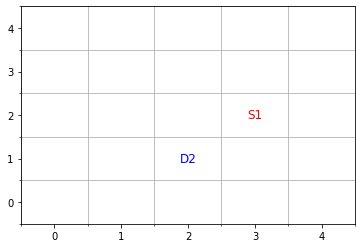

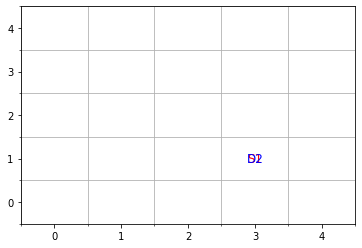

In [7]:
data1 = [
    {'x': 3, 'y': 2, 'color': 'red', 'label': 'S1'},
    {'x': 2, 'y': 1, 'color': 'blue', 'label': 'D2'}
]

data2 = [
    {'x': 3, 'y': 1, 'color': 'red', 'label': 'S1'},
    {'x': 3, 'y': 1, 'color': 'blue', 'label': 'D2'}
]

labeled_scatter_plot(data1)
labeled_scatter_plot(data2)

a) Refactor your code per the following specifications:

* You need separate classes: `Game`, `Player`, `Unit`, and a class for each type of ship.

* Your code needs to be readable -- variables need to be named well, and there shouldn't be too much happening on any single line.

* Each method within a class should be something that the class actually does. For example, a Unit does not build a fleet. A player builds a fleet.

* Each function should be concise and should do just one thing. (Extreme case: if a function can't be seen on a single screen without scrolling, then that's an issue.)

b) Use the with the function `labeled_scatter_plot` to display the board after each turn. **Don't get rid of your text logging. At this point the board display should be an addition, not a replacement for your logging.**

* Use the naming convention `<letter><number>` where `<letter>` represents the type of ship and `<number>` represents the unit number. So, `S1` would correspond to a `Scout` that is a player's `Unit 1`. 

 * `Battlecruiser` should have the letter `Bc` and `Battleship` should have the label `Bs`.

* Player 1 should be blue, and Player 2 should be red.

c) Modify the function `labeled_scatter_plot` so that when two units occupy the same grid square, they do not overlap visually. You should move the units slightly apart while ensuring that they still lie within the required grid square.

# Problem 4 (45 min)

a) Refactor your `Matrix` class so that no method mutates the underlying matrix.

b) Extend your `Matrix` class to include a method `inverse_by_minors()` that computes the inverse using the method of minors.

* [Here](https://www.mathsisfun.com/algebra/matrix-inverse-minors-cofactors-adjugate.html) is an overview of the method of minors.

c) Show that `inverse_by_minors` and `inverse` (which leverages `rref`) give the same result when applied to several different matrices.

d) State the time complexities of `inverse_by_minors` and `inverse` using big-O notation. Provide some justification for your answer.

`inverse_by_minors`: your answer here

`inverse`: your answer here